# Classifying Patients with Heart Disease

### Problem Statement



This project is a collaborative notebook that helps to predict if the patient have any heart condition or not. This is a **binary classification** problem. The machine learning model is not capable of predicting the type of the disease but it can predict if the heart of a person is healthy or not.

The main goal of the project is to help everyone to keep track of their heart condition easily as visiting a doctor is sometimes a very time consuming job and most people are too lazy for a regular check up. This project will help those lazy people to be consious of their heart and might save their lives.

### Dataset


The original data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

The subset is collected from [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset).

___

#### Features

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Exploratory Data Analysis (EDA)


In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/heart-disease.csv")
print("(Rows, Columns)", df.shape)
df.head()

(Rows, Columns) (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Visualize the number of classes present in the data set

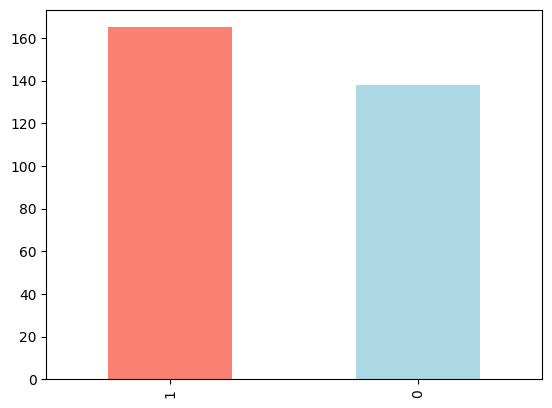

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

#### Correlation between different features

<Axes: >

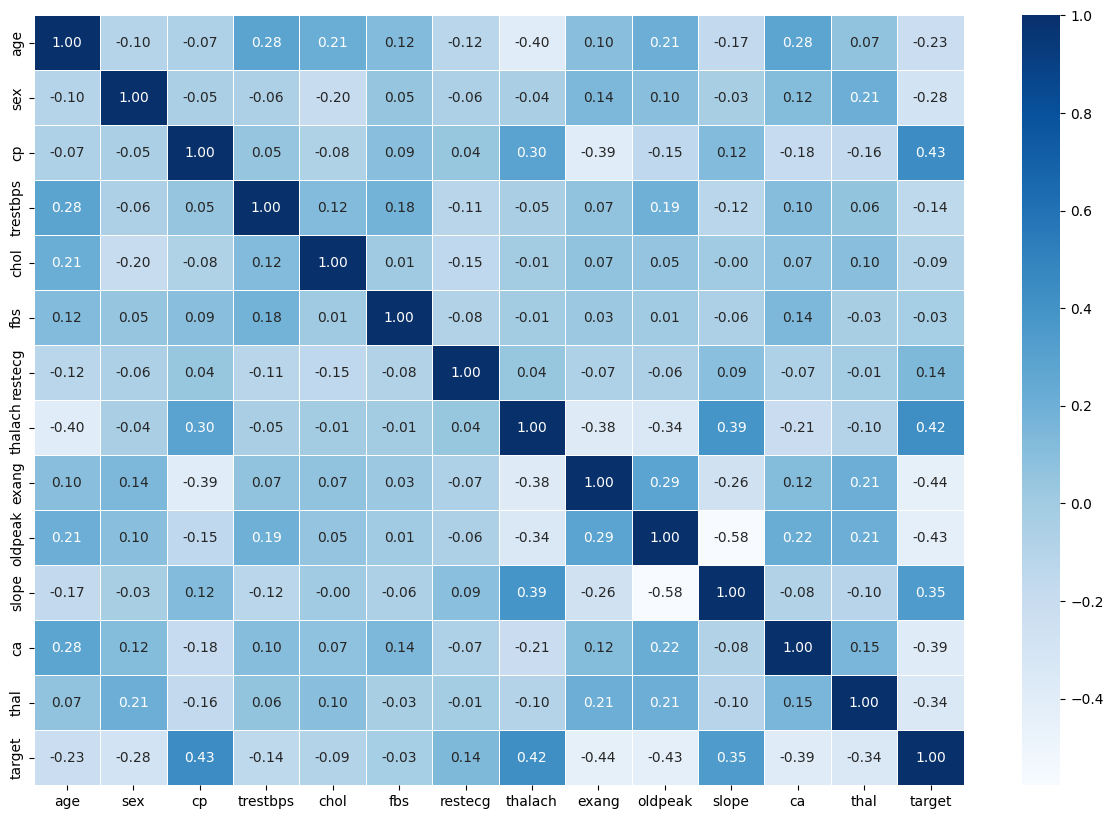

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="Blues")

The correlation heatmap shows that `cp(chest pain type)`, `thalach(maximum heart rate achieved)` and `slope(the slope of the peak exercise ST segment)` has a very high positive correlation with heart disease. On the other hand`exang(exercise induced angina)`, `oldpeak( ST depression induced by exercise relative to rest)`, `ca(number of major vessels (0-3) colored by flourosopy)` and `thal(thalium stress result)` have negative correlation.

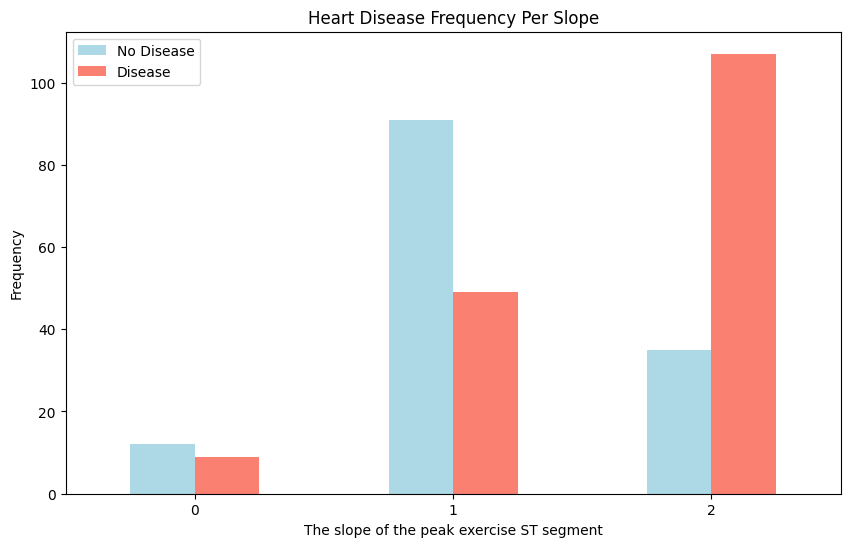

In [ ]:
pd.crosstab(df.slope, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["lightblue", "salmon"])

plt.title("Heart Disease Frequency Per Slope")
plt.xlabel("The slope of the peak exercise ST segment")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

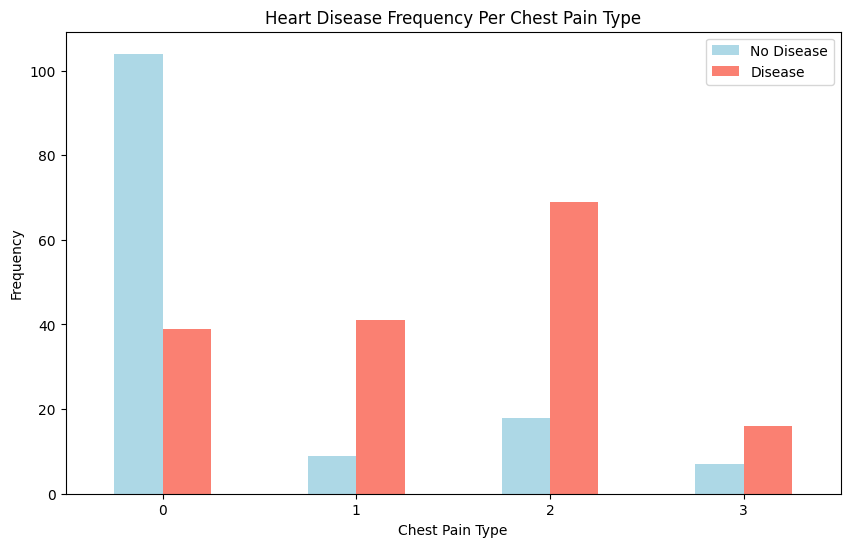

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["lightblue", "salmon"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

### Methodology

The main technique used for training this model is a subset of Machine Learning called `Neural Networks`. Neural Network consists of interconnected nodes, or neurons, organized in layers. Input data is processed through these layers, with each neuron applying a weighted transformation and an activation function. This allows the network to learn complex patterns and make predictions or classifications.

Besides Neural Network, more traditional Machine Learning algorithms such as `Logistic Regression`, `K-Nearest Neighbors` atc. were used to compare the performance of the Neural Network model. `Scikit Learn` library is used in this purpose.

**Steps:**
* Look for missing and non-numeric values
* One hot encode the non-numeric values
* Fill missing values with mean, median or remove the entire row
* Split the data in train and test sets
* Train a model using `Tensorflow` and `Keras`
* Tune hyperparameters and find the best fit using `GridSearchCV()`
* Train models with tradition Machine Learning algorithms using `Scikit-Learn`
* Compare the performance
* keep the best performing model

The train-test ratio is 8:2. 80% data of the data set is used for training and rest for testing. `train_test_split()` function from **Sk-learn** is used for randomly spliting the data into train and test set.

### Model Training

Three models are trained in total in this project. Neural Network, Logistic Regression and K-Nearest Neighbors. The main focus is Neural Network and other two for comparison.

**Steps**
* Load the data set and deal with missing and non-numeric data if needed
* `param_grid` = {
    'hidden_layers': [1, 2, 3, 4, 5],
    'neurons': [25, 50, 100],
    'epochs': [50, 100, 200]
}, are as parameter for hyperparameter tuning with `GridSearchCV()`
* As optimizer `Adam` is used
* For early stopping, `accuracy` was monitored as it is a **Binary Classification** problem with a `patienc` of 3.

#### Imports

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.models import load_model

#### Reading Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
## Check for Missing Data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Training Model using Tensorflow and Keras

In [ ]:
# Reload your dataset
df = pd.read_csv("/content/drive/MyDrive/datasets/heart-disease.csv")

# Extract features and target variable
x = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
dummies = pd.get_dummies(df['target'])
target = dummies.columns
y = dummies.values

# Standardize or normalize the feature data
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define a function to create your Keras model with early stopping
def create_model(hidden_layers=2, neurons=50, learning_rate=0.001, batch_size=32, epochs=100):
    model = Sequential()
    model.add(Dense(neurons, input_dim=x.shape[1], activation="relu"))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation="relu"))
    model.add(Dense(y.shape[1], activation="softmax"))

    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

early_stopping = EarlyStopping(monitor='accuracy', patience=3)
# Create a KerasClassifier based on your model creation function
model = KerasClassifier(build_fn=create_model, verbose=2)

# Define the hyperparameter grid
param_grid = {
    'hidden_layers': [1, 2, 3, 4, 5],
    'neurons': [25, 50, 100],
    'epochs': [50, 100, 200]
}

# Create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=True,)

# Fit the grid search to your data
grid_result = grid.fit(x_train, y_train, callbacks=[early_stopping])

# Print the best hyperparameters and corresponding accuracy
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

# The best model is available as grid_result.best_estimator_
best_model = grid_result.best_estimator_

<ipython-input-5-561019c77fd2>:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=2)


Fitting 3 folds for each of 45 candidates, totalling 135 fits
Epoch 1/50
6/6 - 6s - loss: 0.8277 - accuracy: 0.4596 - 6s/epoch - 927ms/step
Epoch 2/50
6/6 - 0s - loss: 0.7593 - accuracy: 0.5217 - 18ms/epoch - 3ms/step
Epoch 3/50
6/6 - 0s - loss: 0.7103 - accuracy: 0.5963 - 30ms/epoch - 5ms/step
Epoch 4/50
6/6 - 0s - loss: 0.6647 - accuracy: 0.6211 - 18ms/epoch - 3ms/step
Epoch 5/50
6/6 - 0s - loss: 0.6243 - accuracy: 0.6584 - 19ms/epoch - 3ms/step
Epoch 6/50
6/6 - 0s - loss: 0.5883 - accuracy: 0.6832 - 18ms/epoch - 3ms/step
Epoch 7/50
6/6 - 0s - loss: 0.5611 - accuracy: 0.6957 - 19ms/epoch - 3ms/step
Epoch 8/50
6/6 - 0s - loss: 0.5380 - accuracy: 0.7205 - 19ms/epoch - 3ms/step
Epoch 9/50
6/6 - 0s - loss: 0.5134 - accuracy: 0.7329 - 18ms/epoch - 3ms/step
Epoch 10/50
6/6 - 0s - loss: 0.4943 - accuracy: 0.7329 - 17ms/epoch - 3ms/step
Epoch 11/50
6/6 - 0s - loss: 0.4768 - accuracy: 0.7453 - 20ms/epoch - 3ms/step
Epoch 12/50
6/6 - 0s - loss: 0.4633 - accuracy: 0.7640 - 19ms/epoch - 3ms/step

3/3 - 0s - loss: 0.4785 - accuracy: 0.7654 - 124ms/epoch - 41ms/step
Epoch 1/50
6/6 - 1s - loss: 0.7135 - accuracy: 0.5185 - 814ms/epoch - 136ms/step
Epoch 2/50
6/6 - 0s - loss: 0.6482 - accuracy: 0.6173 - 18ms/epoch - 3ms/step
Epoch 3/50
6/6 - 0s - loss: 0.5935 - accuracy: 0.7037 - 18ms/epoch - 3ms/step
Epoch 4/50
6/6 - 0s - loss: 0.5502 - accuracy: 0.7099 - 20ms/epoch - 3ms/step
Epoch 5/50
6/6 - 0s - loss: 0.5149 - accuracy: 0.7222 - 17ms/epoch - 3ms/step
Epoch 6/50
6/6 - 0s - loss: 0.4850 - accuracy: 0.7407 - 20ms/epoch - 3ms/step
Epoch 7/50
6/6 - 0s - loss: 0.4639 - accuracy: 0.7716 - 18ms/epoch - 3ms/step
Epoch 8/50
6/6 - 0s - loss: 0.4471 - accuracy: 0.7901 - 17ms/epoch - 3ms/step
Epoch 9/50
6/6 - 0s - loss: 0.4328 - accuracy: 0.8086 - 17ms/epoch - 3ms/step
Epoch 10/50
6/6 - 0s - loss: 0.4208 - accuracy: 0.8086 - 17ms/epoch - 3ms/step
Epoch 11/50
6/6 - 0s - loss: 0.4121 - accuracy: 0.8086 - 24ms/epoch - 4ms/step
Epoch 12/50
6/6 - 0s - loss: 0.4033 - accuracy: 0.8272 - 17ms/epoch 

3/3 - 0s - loss: 0.4090 - accuracy: 0.7750 - 123ms/epoch - 41ms/step
Epoch 1/50
6/6 - 1s - loss: 0.6312 - accuracy: 0.6211 - 909ms/epoch - 152ms/step
Epoch 2/50
6/6 - 0s - loss: 0.5478 - accuracy: 0.7702 - 18ms/epoch - 3ms/step
Epoch 3/50
6/6 - 0s - loss: 0.4910 - accuracy: 0.8261 - 20ms/epoch - 3ms/step
Epoch 4/50
6/6 - 0s - loss: 0.4578 - accuracy: 0.8323 - 18ms/epoch - 3ms/step
Epoch 5/50
6/6 - 0s - loss: 0.4305 - accuracy: 0.8509 - 18ms/epoch - 3ms/step
Epoch 6/50
6/6 - 0s - loss: 0.4087 - accuracy: 0.8571 - 19ms/epoch - 3ms/step
Epoch 7/50
6/6 - 0s - loss: 0.3911 - accuracy: 0.8571 - 20ms/epoch - 3ms/step
Epoch 8/50
6/6 - 0s - loss: 0.3768 - accuracy: 0.8634 - 17ms/epoch - 3ms/step
Epoch 9/50
6/6 - 0s - loss: 0.3636 - accuracy: 0.8696 - 19ms/epoch - 3ms/step
Epoch 10/50
6/6 - 0s - loss: 0.3534 - accuracy: 0.8696 - 18ms/epoch - 3ms/step
Epoch 11/50
6/6 - 0s - loss: 0.3437 - accuracy: 0.8634 - 18ms/epoch - 3ms/step
Epoch 12/50
6/6 - 0s - loss: 0.3352 - accuracy: 0.8634 - 18ms/epoch 

In [ ]:
# Make predictions on the test data
y_pred = best_model.predict(x_test)
y_test_classes =  y_test.argmax(axis=-1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred)
print(f"Test Accuracy: {accuracy}")

best_model.model.save("/content/drive/MyDrive/model_tf_hp.h5")

In [ ]:
# Load pre-trained model
loaded_model_tf = load_model("/content/drive/MyDrive/model_tf_hp.h5")

In [ ]:
# Reload your dataset
df = pd.read_csv("/content/drive/MyDrive/datasets/heart-disease.csv")

# Extract features and target variable
x = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
dummies = pd.get_dummies(df['target'])
target = dummies.columns
y = dummies.values

# Standardize or normalize the feature data
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Predict probabilities for each class
y_pred_probs = loaded_model_tf.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_classes = y_pred_probs.argmax(axis=-1)

# Convert one-hot encoded 'y_test' to integer class labels
y_test_classes = y_test.argmax(axis=-1)

# precision_score, recall_score, f1_score

# Calculate different evaluation matrices
accuracy_tf = accuracy_score(y_test_classes, y_pred_classes)
precision_tf = precision_score(y_test_classes, y_pred_classes)
recall_tf = recall_score(y_test_classes, y_pred_classes)
f1_tf = f1_score(y_test_classes, y_pred_classes)

print(f"Accuracy: {accuracy_tf}")
print(f"Precision: {precision_tf}")
print(f"Recall: {recall_tf}")
print(f"F1: {f1_tf}")

2/2 [==============================] - 0s 7ms/step
Accuracy: 0.9016393442622951
Precision: 0.90625
Recall: 0.90625
F1: 0.90625


#### Logistic Regression



Logistic Regression is a statistical model used for binary classification. It calculates the probability of an input belonging to one of two classes, typically denoted as 0 and 1. It employs a logistic function to transform a linear combination of input features into a probability score, which is then used to make classification decisions. The model is trained using a maximum likelihood estimation approach to optimize its coefficients, enabling it to make predictions on new data by assigning it to the class with the highest probability. Logistic Regression is widely used in machine learning and statistics for its simplicity and interpretability.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/heart-disease.csv")

X = df.drop("target", axis=1)
y = df.target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

# Check the best parameters
gs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
y_preds = gs_log_reg.predict(X_test)

accuracy_lg = accuracy_score(y_test, y_preds)
precision_lg = precision_score(y_test, y_preds)
recall_lg = recall_score(y_test, y_preds)
f1_lg = f1_score(y_test, y_preds)

print(f"Accuracy: {accuracy_lg}")
print(f"Precision: {precision_lg}")
print(f"Recall: {recall_lg}")
print(f"F1: {f1_lg}")

Accuracy: 0.8524590163934426
Precision: 0.7692307692307693
Recall: 1.0
F1: 0.8695652173913044


#### K Nearest Neighbors

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for classification and regression tasks. In KNN, an object is classified or predicted based on the majority class or average of its k-nearest neighbors in a feature space. It relies on a distance metric (e.g., Euclidean distance) to measure similarity between data points. KNN is non-parametric, instance-based, and requires choosing an appropriate value for k, which influences its performance and computational complexity.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/heart-disease.csv")

X = df.drop("target", axis=1)
y = df.target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

gs_knn = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
gs_knn.fit(X_train, y_train)

gs_knn.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [ ]:
y_preds_knn = gs_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_preds_knn)
precision_knn = precision_score(y_test, y_preds_knn)
recall_knn = recall_score(y_test, y_preds_knn)
f1_knn = f1_score(y_test, y_preds_knn)

print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1: {f1_knn}")

Accuracy: 0.7213114754098361
Precision: 0.8
Recall: 0.6857142857142857
F1: 0.7384615384615385


## Model Evaluation

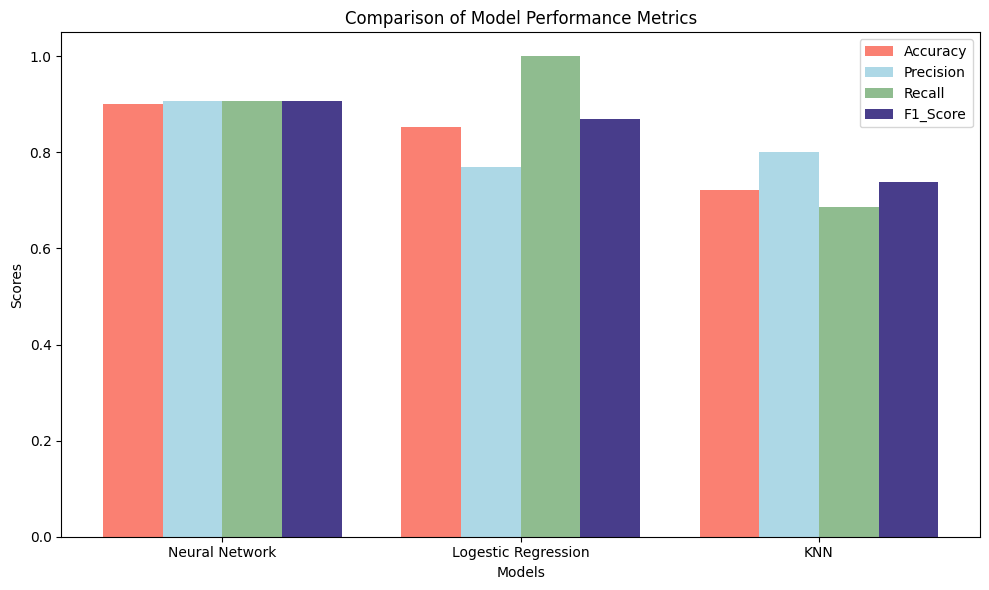

In [ ]:
models = ['Neural Network', 'Logestic Regression', 'KNN']

# Define the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']

# Define the values for each metric for each model
# Replace these with your actual values
accuracy_values = [accuracy_tf, accuracy_lg, accuracy_knn]
precision_values = [precision_tf, precision_lg, precision_knn]
recall_values = [recall_tf, recall_lg, recall_knn]
f1_score_values = [f1_tf, f1_lg, f1_knn]

# Create a bar plot
width = 0.2
x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))

colors = ["salmon", "lightblue", "darkseagreen", "darkslateblue"]

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, eval(f'{metric.lower()}_values'), width, label=metric, color=colors[i])

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

def plot_conf_mat(y_test, y_preds, title):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.title(title)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

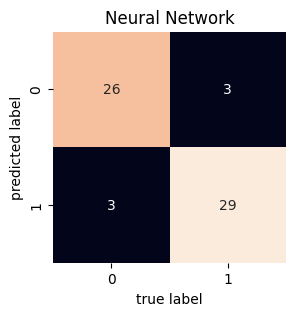

In [ ]:
plot_conf_mat(y_test_classes, y_pred_classes, 'Neural Network')

## Results and Discussiony

The above plot shows that **Neural Network** model performed the best on the test data set. Logistic Regression and KNN algorithm performed badly comparing with NN model.

## Group Description

**Name:** Zahidul Islam Turja, <br>
**ID:** 2020-1-60-260

**Name:** Kahirul Islam ,<br>
**ID:** 2020-1-60-109

**Name:** Niaz Ahmed<br>
**ID:** 2020-2-60-192

**Name:** Sudipta Podder<br>
**ID:** 2020-2-60-192